In [1]:
import pandas as pd #Frameworks library
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib in line


import warnings
warnings.filterwarnings ("ignore")  #ignore the warnings not display

UsageError: unrecognized arguments: line


In [ ]:
import os

In [ ]:
os.chdir ("C:\\Users\\Ruval Lap\\Desktop\\Jupyter Files\\Section 6 Advance Visualization")
print (os.getcwd())

In [3]:
movies = pd.read_csv ("P4-Movie-Ratings.csv")

In [4]:
movies.head()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [5]:
movies.columns

Index(['Film', 'Genre', 'Rotten Tomatoes Ratings %', 'Audience Ratings %',
       'Budget (million $)', 'Year of release'],
      dtype='object')

In [6]:
movies.columns = ["Film","Genre","CriticRating","AudienceRating","BudgetMillions","Year"]
movies.head()

,Film,Genre,CriticRating,AudienceRating,BudgetMillions,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [7]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Film            559 non-null    object
 1   Genre           559 non-null    object
 2   CriticRating    559 non-null    int64 
 3   AudienceRating  559 non-null    int64 
 4   BudgetMillions  559 non-null    int64 
 5   Year            559 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


In [ ]:
#Changes Film, Genre & Year into a Category variable not object (better for data analysis)

In [8]:
movies.Film = movies.Film.astype("category")
movies.Genre = movies.Genre.astype("category")
movies.Year = movies.Year.astype("category")
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Film            559 non-null    category
 1   Genre           559 non-null    category
 2   CriticRating    559 non-null    int64   
 3   AudienceRating  559 non-null    int64   
 4   BudgetMillions  559 non-null    int64   
 5   Year            559 non-null    category
dtypes: category(3), int64(3)
memory usage: 36.5 KB


In [9]:
#List of Genre
movies.Genre.cat.categories

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

In [10]:
movies.Year.cat.categories

Int64Index([2007, 2008, 2009, 2010, 2011], dtype='int64')

### Joint Plot

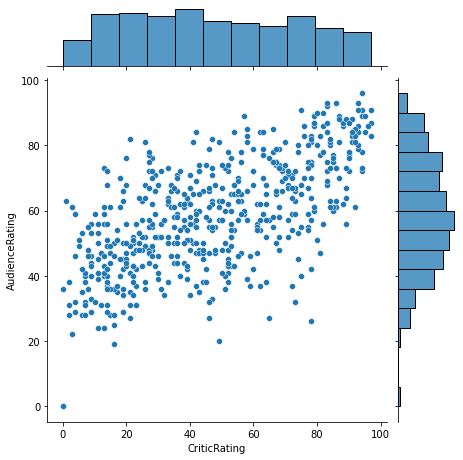

In [11]:
import warnings
warnings.filterwarnings ("ignore")  #ignore the warnings not display

j = sns.jointplot (data=movies, x="CriticRating", y="AudienceRating", size= 6.5)

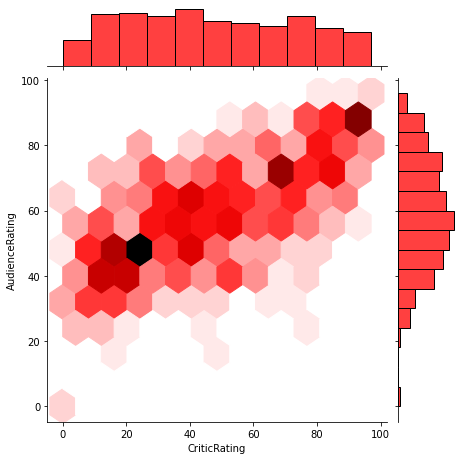

In [17]:
j = sns.jointplot (data=movies, x="CriticRating", y="AudienceRating", size= 6.5, kind = "hex", color="r")

### Histograms

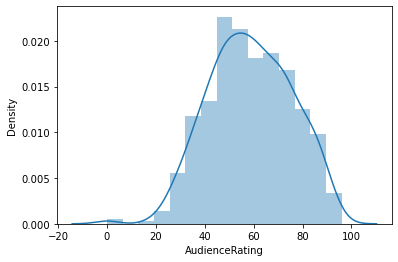

In [18]:
m1 = sns.distplot (movies.AudienceRating, bins=15)

In [19]:
#Change the background style
sns.set_style ("darkgrid")

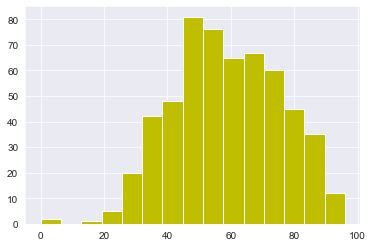

In [20]:
n1 = plt.hist(movies.AudienceRating, bins=15, color="y")

### Stacked Histogram

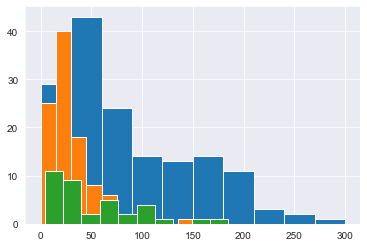

In [21]:
plt.hist(movies[movies.Genre == "Action"].BudgetMillions)
plt.hist(movies[movies.Genre == "Drama"].BudgetMillions)
plt.hist(movies[movies.Genre == "Thriller"].BudgetMillions)
plt.show()

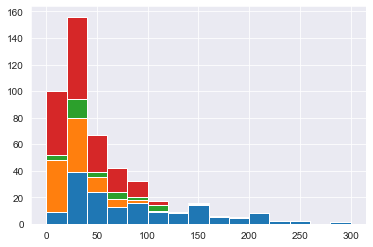

In [22]:
plt.hist ([ movies[movies.Genre == "Action"].BudgetMillions, 
            movies[movies.Genre == "Drama"].BudgetMillions, 
            movies[movies.Genre == "Thriller"].BudgetMillions,
            movies[movies.Genre == "Comedy"].BudgetMillions], 
            bins=15, stacked=True)
plt.show()

In [23]:
#For can move into a list and take the value
for gen in movies.Genre.cat.categories: #Remeber put the :
    print (gen)

Action
Adventure
Comedy
Drama
Horror
Romance
Thriller


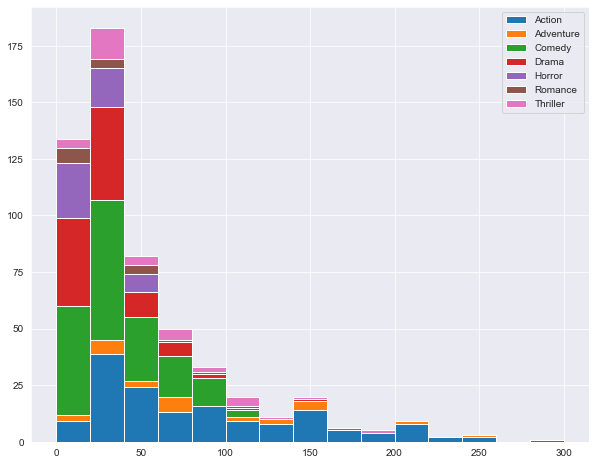

In [24]:
list1 = list () #Create a empty list
label_list = list ()

for gen in movies.Genre.cat.categories: #Remeber put the :
    list1.append (movies[movies.Genre == gen ].BudgetMillions) #Add items to a list 
    label_list.append (gen)
    
plt.rcParams ["figure.figsize"] = 10,8 #Plot Size x,y
h = plt.hist(list1, bins=15, stacked=True, label=label_list, rwidth=5) #make the graph with the list
plt.legend ()   #(loc="upper left", bbox_to_anchor= (1,1)) #Label show
plt.show()

### KDE Plot (Kernel Distribution Estimation)

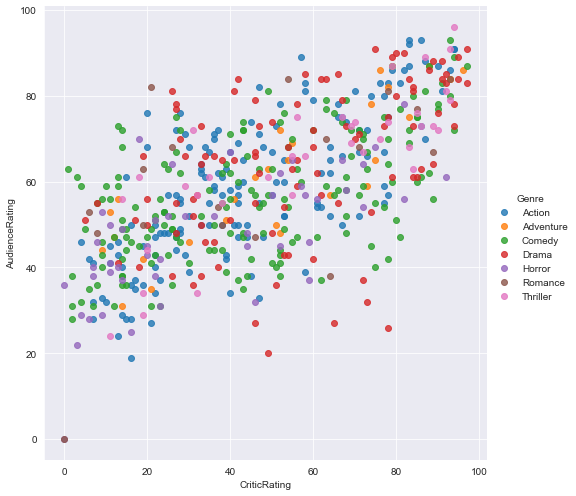

In [25]:
vis1 = sns.lmplot (data= movies, x="CriticRating", y="AudienceRating",
                  fit_reg = False, hue="Genre", size= 7, aspect=1)

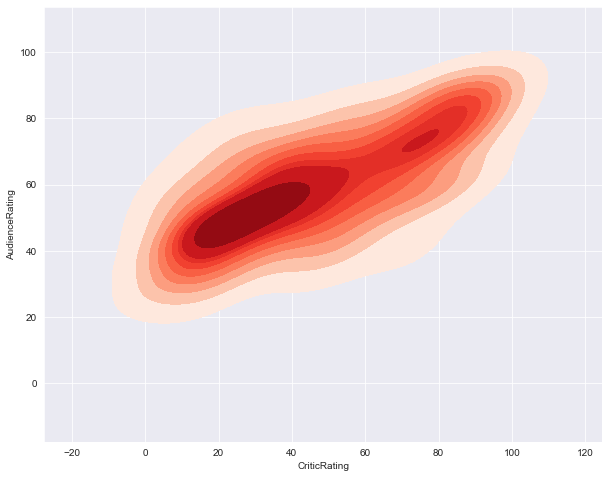

In [29]:
k1 = sns.kdeplot (movies.CriticRating, movies.AudienceRating, shade=True,
                 shade_lowest=False, cmap="Reds")

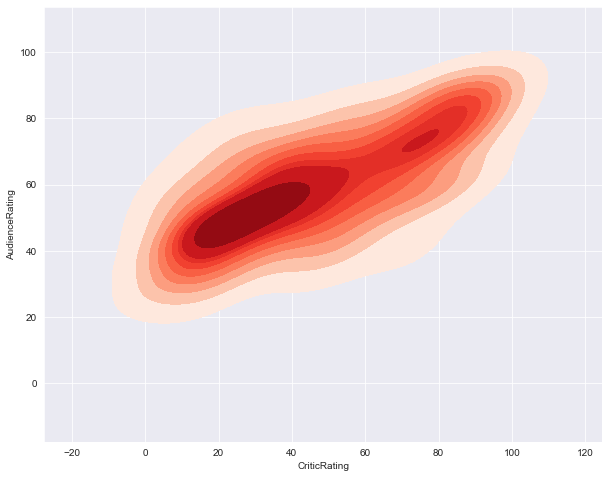

In [30]:
k1b = sns.kdeplot (movies.CriticRating, movies.AudienceRating, shade=True,
                 cmap="Reds")

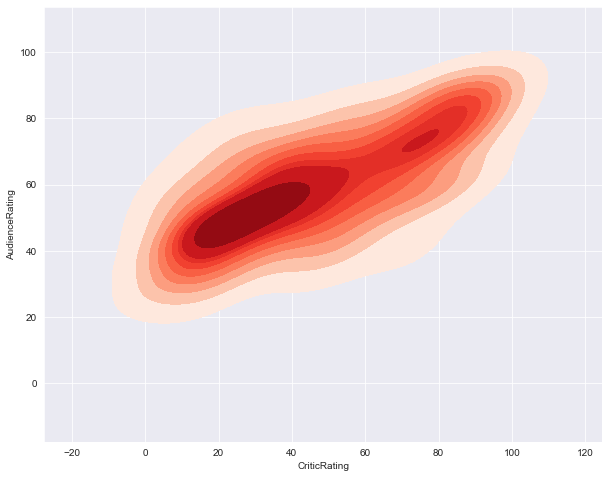

In [31]:
#Combine both graph in one
k1 = sns.kdeplot (movies.CriticRating, movies.AudienceRating, shade=True,
                 shade_lowest=False, cmap="Reds")
k1b = sns.kdeplot (movies.CriticRating, movies.AudienceRating, shade=True,
                 cmap="Reds")

### Working with Subplots

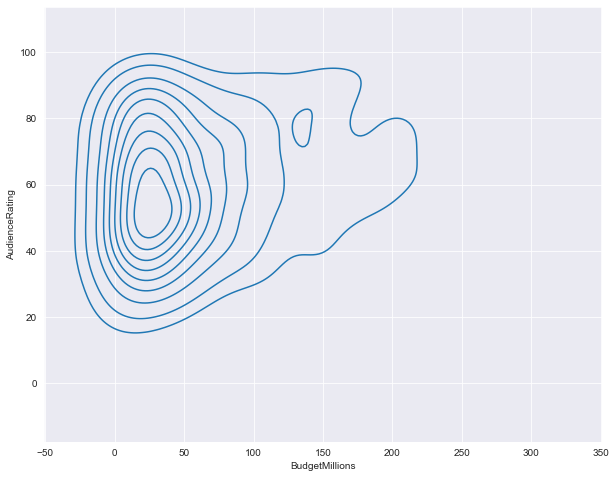

In [32]:
k1 = sns.kdeplot (movies.BudgetMillions, movies.AudienceRating)

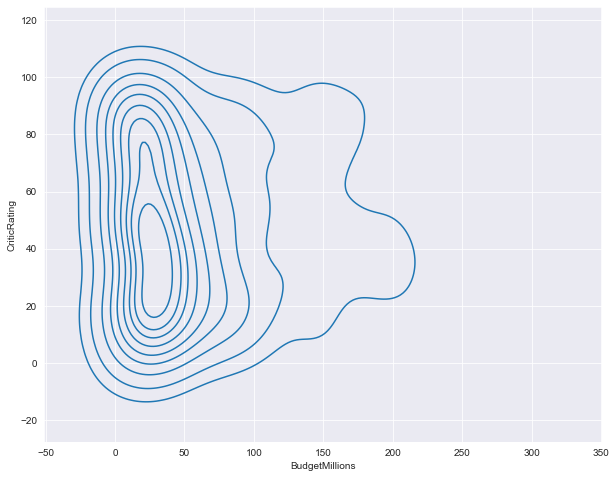

In [33]:
k1 = sns.kdeplot (movies.BudgetMillions, movies.CriticRating)

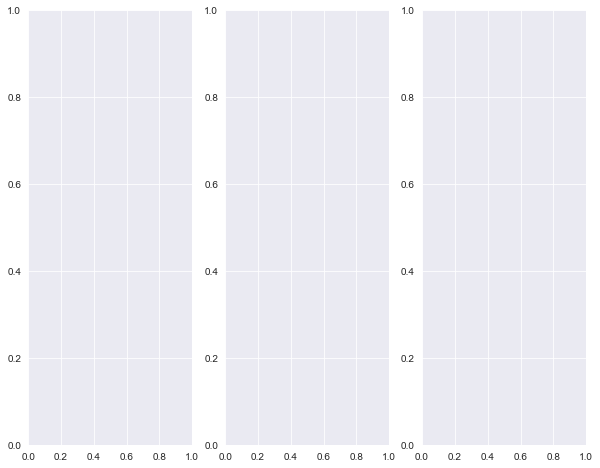

In [35]:
f, ax = plt.subplots (1,3)

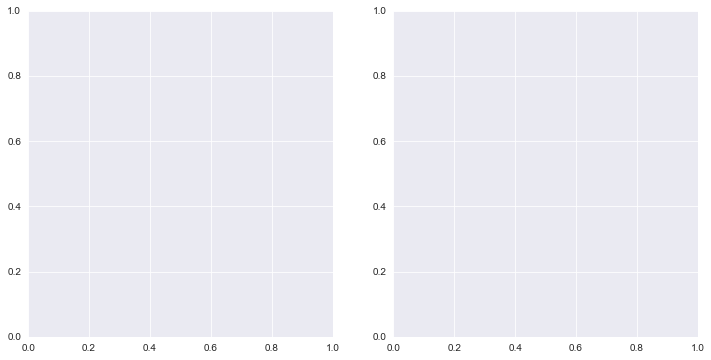

In [37]:
f, axes = plt.subplots (1,2, figsize =(12,6))

[(-20.0, 120.0)]

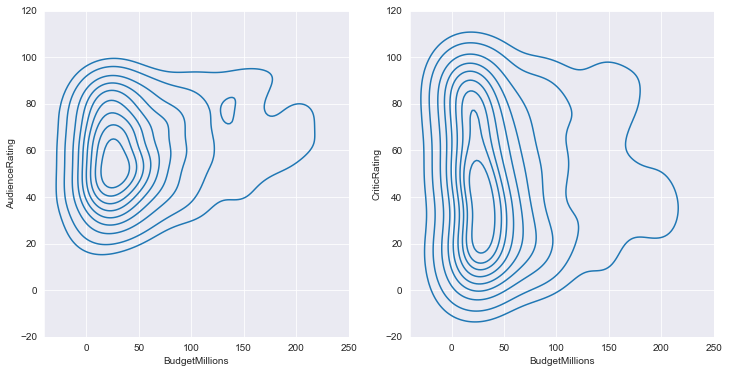

In [46]:
f, axes = plt.subplots (1,2, figsize =(12,6)) # f, axes = plt.subplots (1,2, figsize =(12,6), sharex=True), sharey=True) #Share values in axes for multiple plots       
k1 = sns.kdeplot (movies.BudgetMillions, movies.AudienceRating, ax=axes [0])
k2 = sns.kdeplot (movies.BudgetMillions, movies.CriticRating, ax=axes [1])

k1.set(xlim=(-40,250))
k2.set(xlim=(-40,250))
k1.set(ylim=(-20,120))
k2.set(ylim=(-20,120))

### ViolinPlots

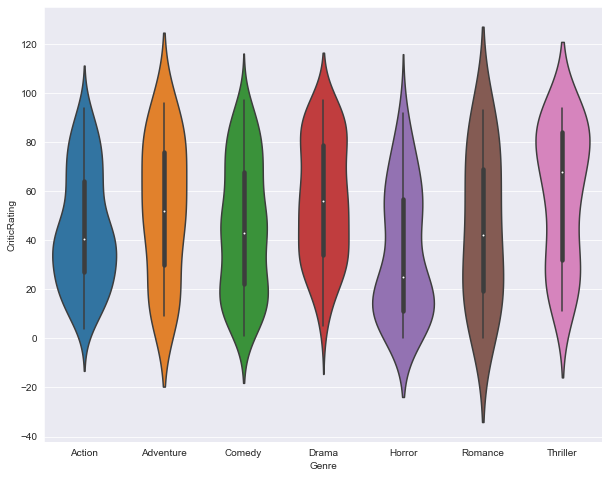

In [49]:
z = sns.violinplot (data=movies, x="Genre", y="CriticRating")

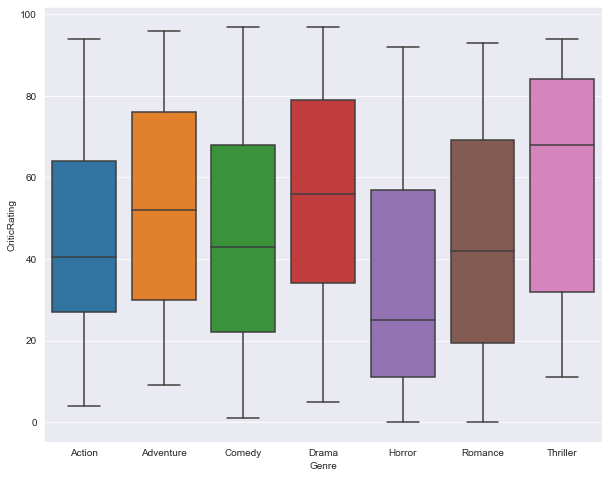

In [51]:
w = sns.boxplot (data=movies, x="Genre", y="CriticRating")

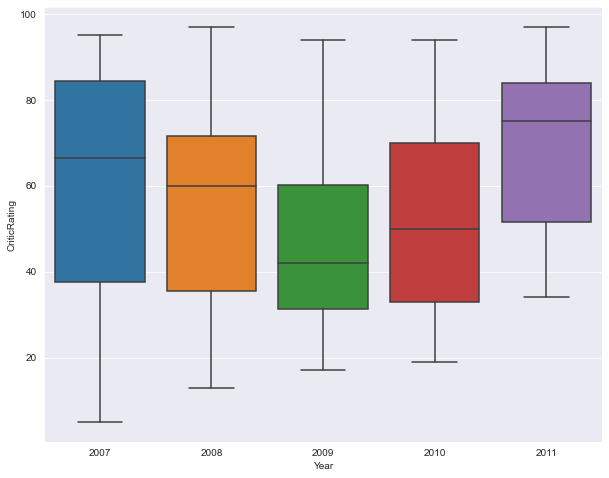

In [53]:
z = sns.boxplot (data=movies[movies.Genre=="Drama"], x="Year", y="CriticRating")

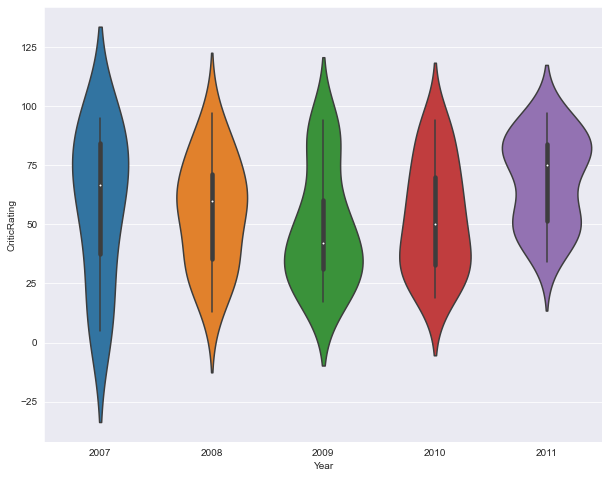

In [54]:
z = sns.violinplot (data=movies[movies.Genre=="Drama"], x="Year", y="CriticRating")

### Creating a Facet Grid

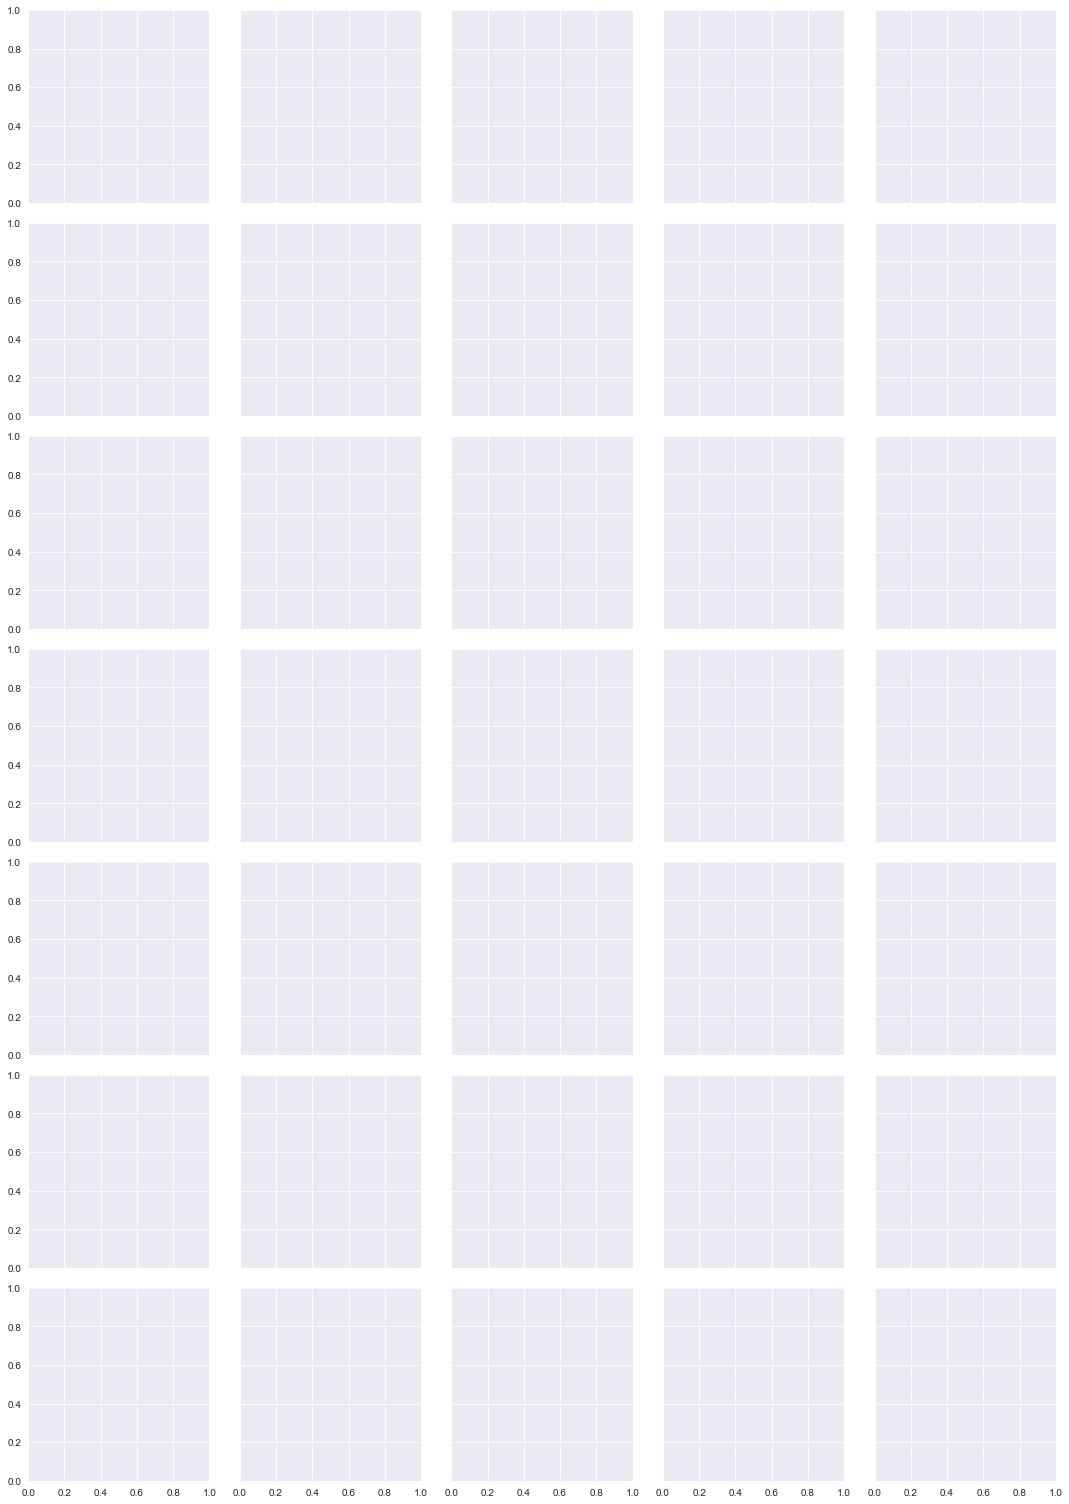

In [55]:
g = sns.FacetGrid(movies,row="Genre",col="Year",hue="Genre")

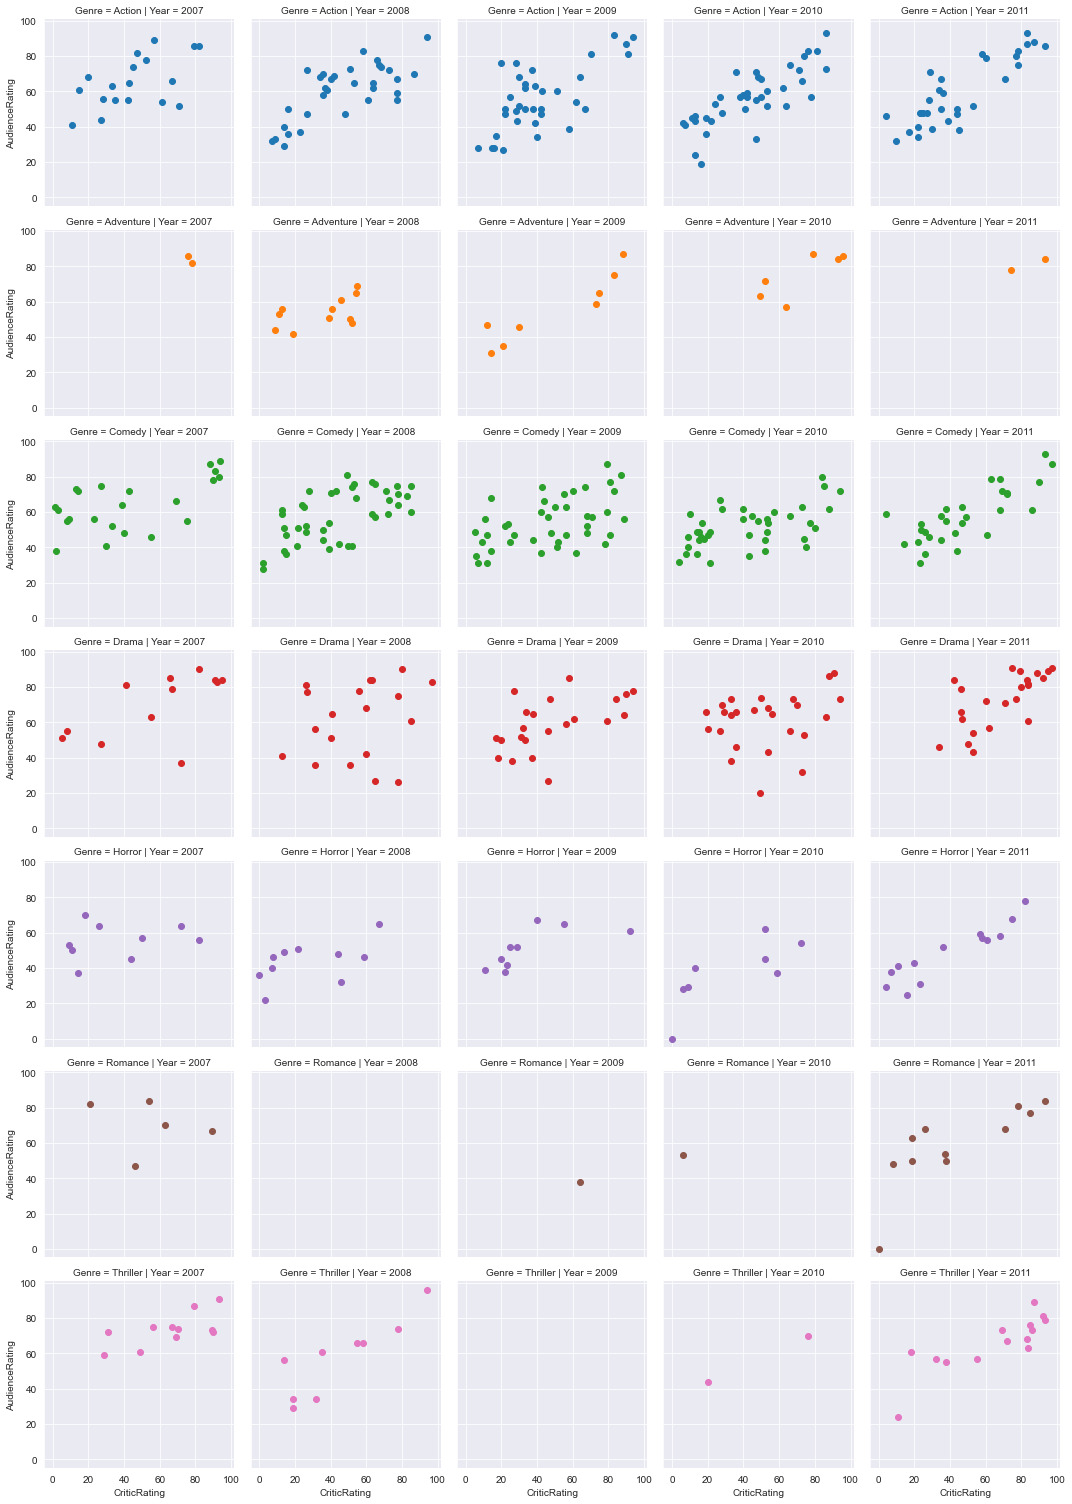

In [57]:
g = sns.FacetGrid(movies,row="Genre",col="Year", hue="Genre") #Make the Grid
g = g.map (plt.scatter, "CriticRating" , "AudienceRating")  #Put info into the Grid

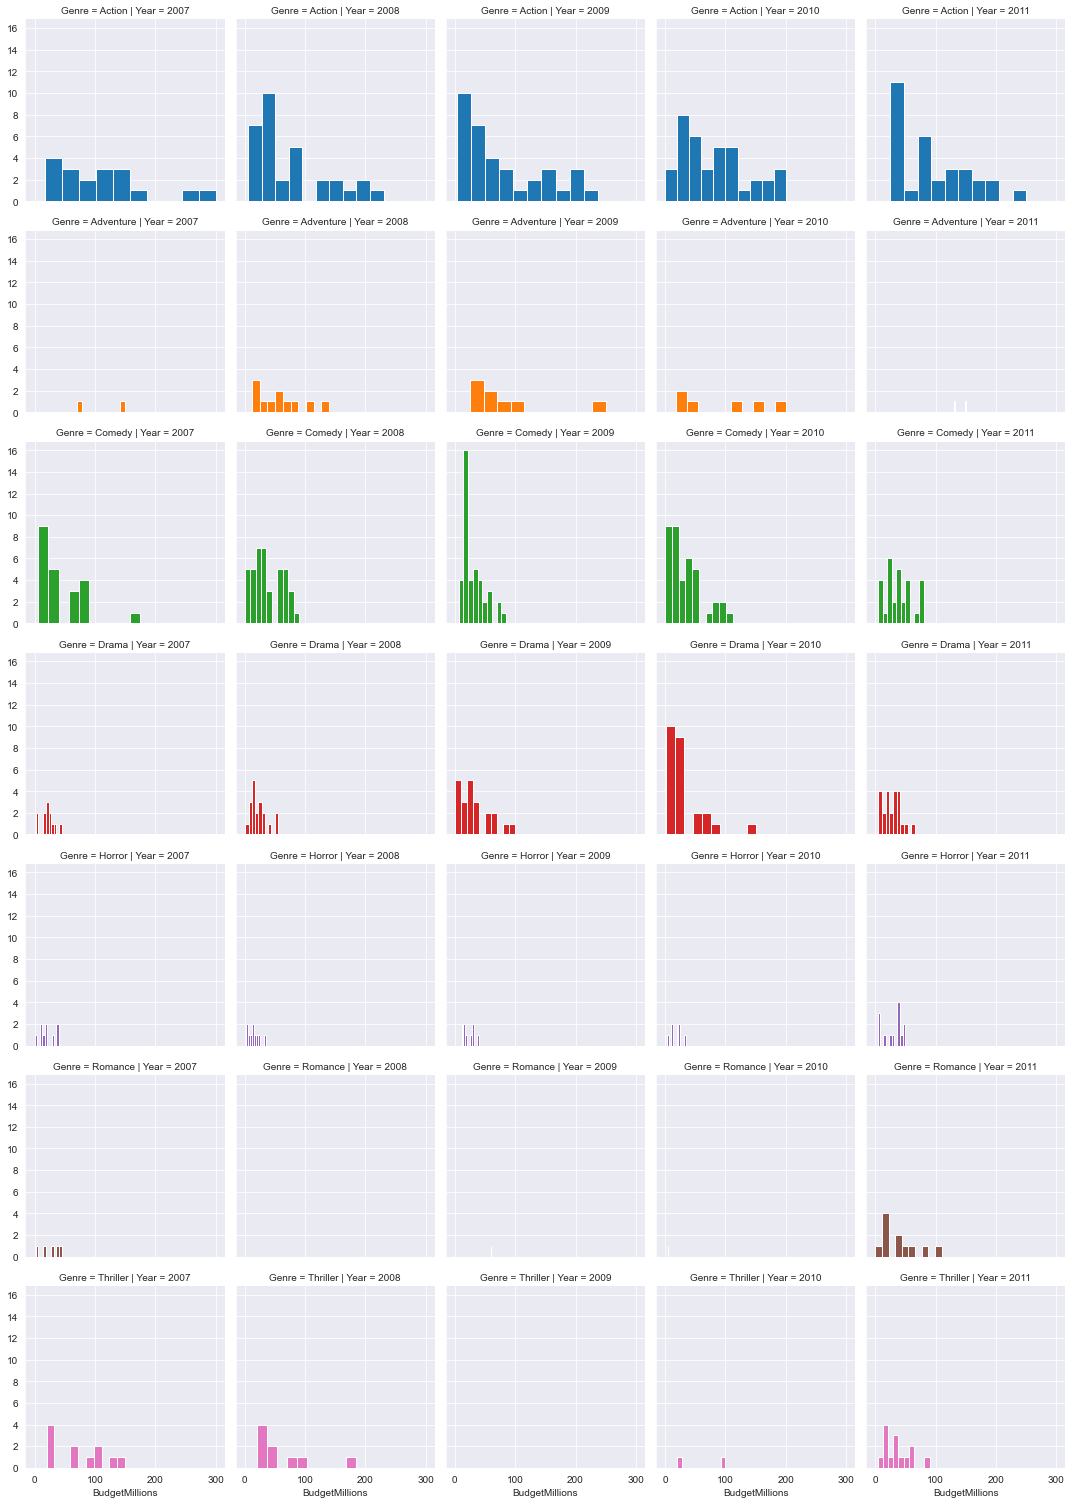

In [58]:
g = sns.FacetGrid(movies,row="Genre",col="Year", hue="Genre") #Make the Grid
g = g.map (plt.hist, "BudgetMillions")  #Put info into the Grid

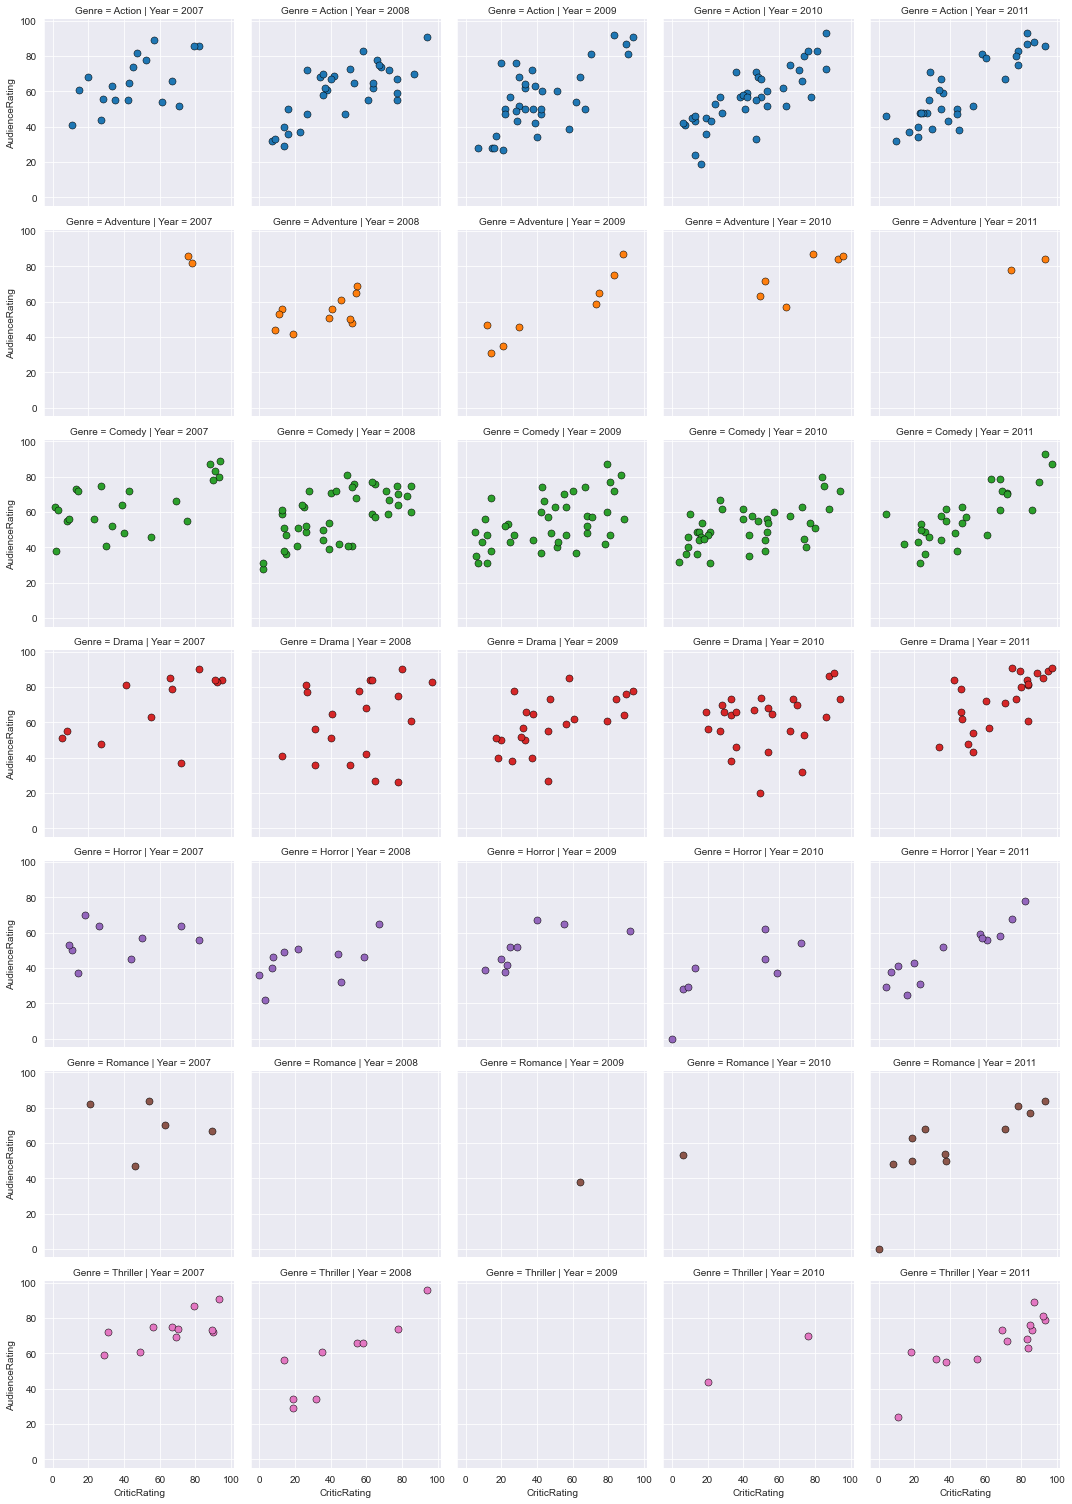

In [60]:
g = sns.FacetGrid(movies,row="Genre",col="Year", hue="Genre") #Make the Grid
kws = dict (s=50, linewidth=0.5, edgecolor="black") #Custom grph grid
g = g.map (plt.scatter, "CriticRating" , "AudienceRating", **kws)  #Put info into the Grid

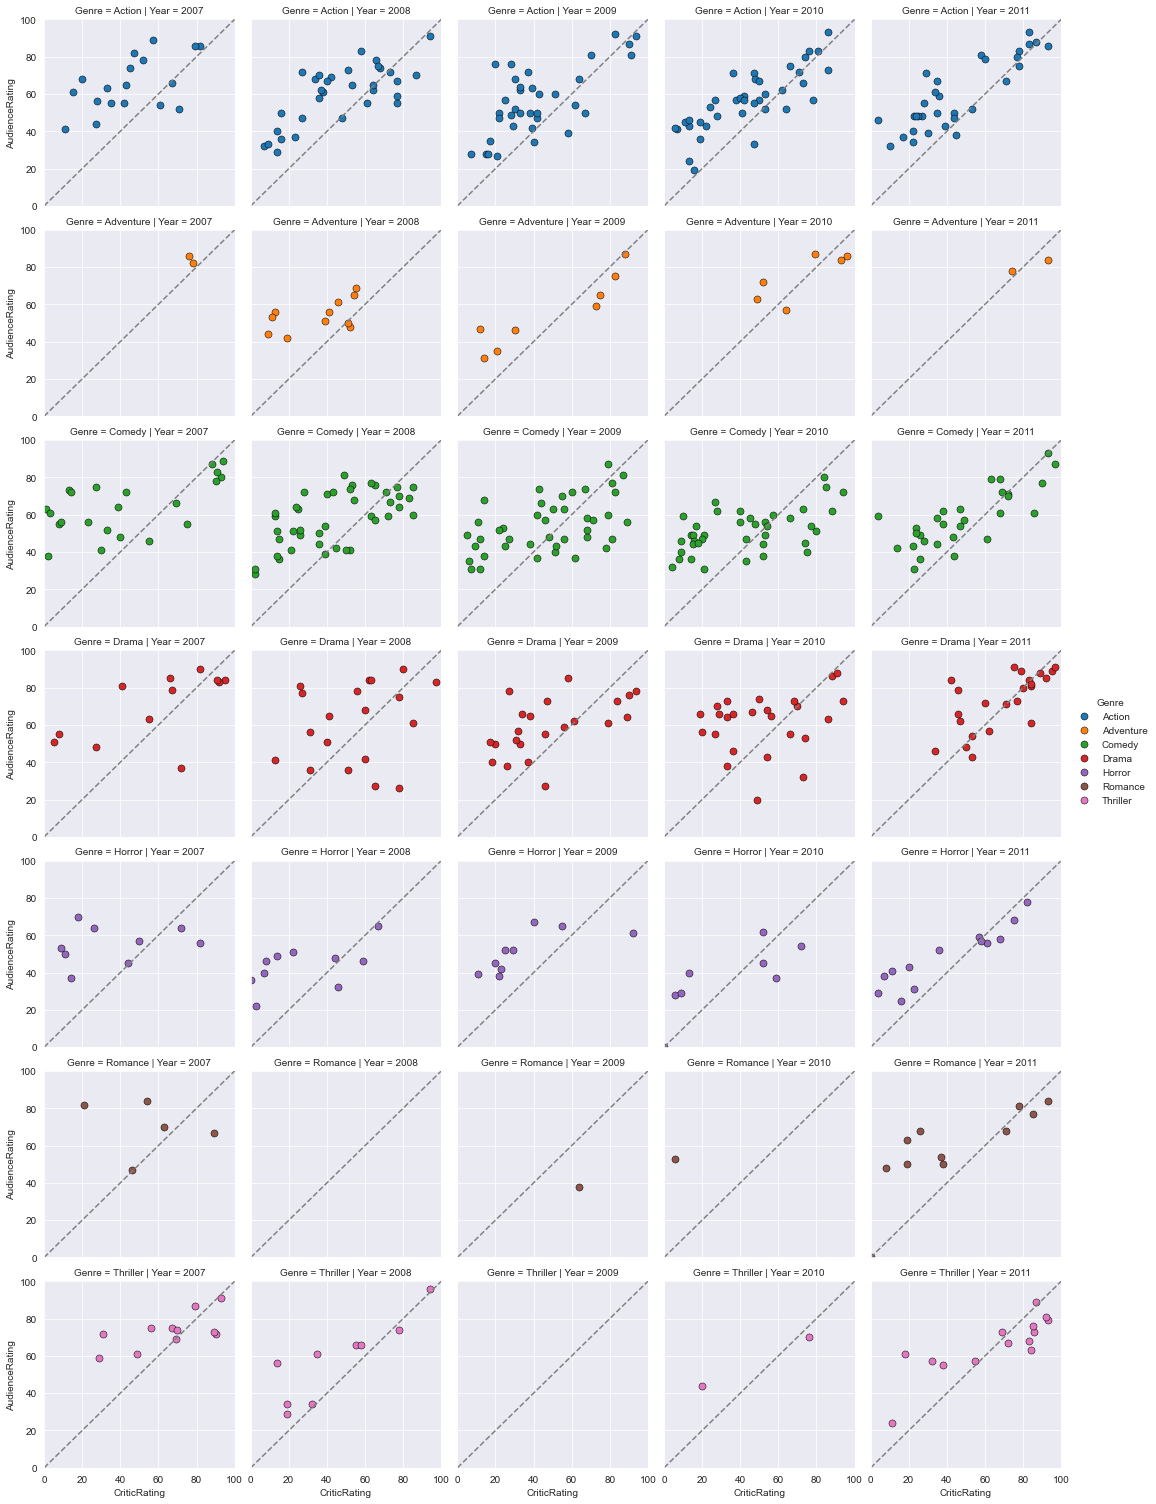

In [67]:
# Controlling Axes and Adding diagonals

g = sns.FacetGrid(movies,row="Genre",col="Year", hue="Genre") #Make the Grid
kws = dict (s=50, linewidth=0.5, edgecolor="black") #Custom grph grid
g = g.map (plt.scatter, "CriticRating" , "AudienceRating", **kws)  #Put info into the Gridn
g.set (xlim=(0,100), ylim=(0,100)) #Axis limits

for ax in g.axes.flat: # g.axes.flat instruction to move into all matrix grid graph
    ax.plot ((0,100), (0,100), c="gray", ls="--" ) #Diagonal settings 
g.add_legend() #Add label    


### Dashboards

[(20.0, 100.0)]

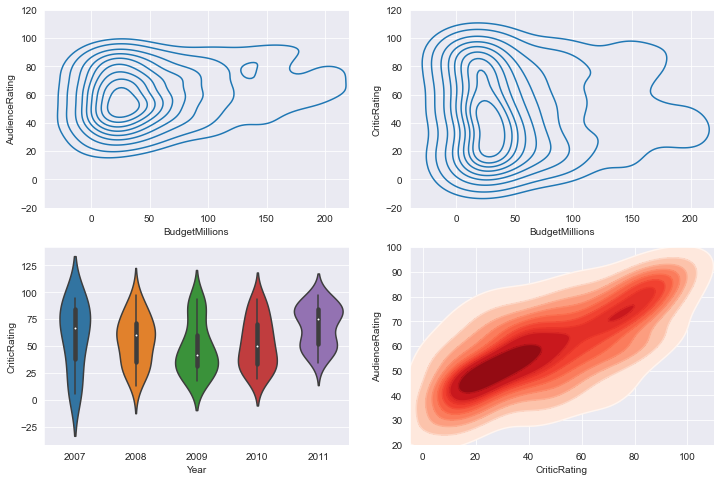

In [22]:
sns.set_style  ("darkgrid")
f, axes = plt.subplots (2,2, figsize =(12,8)) # f, axes = plt.subplots (1,2, figsize =(12,6), sharex=True), sharey=True) #Share values in axes for multiple plots      
#Graph #1
k1 = sns.kdeplot (movies.BudgetMillions, movies.AudienceRating, ax=axes [0,0])
k1.set(xlim=(-40,220))
k1.set(ylim=(-20,120))
#Graph #2
k2 = sns.kdeplot (movies.BudgetMillions, movies.CriticRating, ax=axes [0,1])
k2.set(xlim=(-40,220))
k2.set(ylim=(-20,120))
#Graph #3
k3 = sns.violinplot (data=movies[movies.Genre=="Drama"], x="Year", y="CriticRating", ax=axes [1,0])
#Graph #4
k4 = sns.kdeplot (movies.CriticRating, movies.AudienceRating, shade=True,
                 shade_lowest=False, cmap="Reds", ax=axes [1,1])
k4b = sns.kdeplot (movies.CriticRating, movies.AudienceRating,
                 cmap="Reds", ax=axes [1,1])
k4.set(xlim=(-5,110))
k4.set(ylim=(20,100))
k4b.set(xlim=(-5,110))
k4b.set(ylim=(20,100))

### To Add a plt graph into the dashboard 
#axes [1,1].hist(movies.AudienceRating, bins=15, color="y")

### Styling Dashboards

[(0.0, 120.0)]

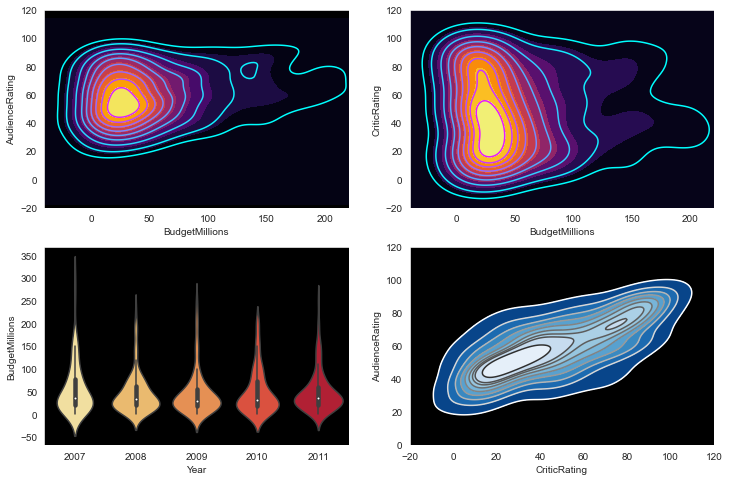

In [27]:
sns.set_style  ("dark", {"axes.facecolor":"black"})
f, axes = plt.subplots (2,2, figsize =(12,8)) # f, axes = plt.subplots (1,2, figsize =(12,6), sharex=True), sharey=True) #Share values in axes for multiple plots      

#Graph #1  uses cmap inferno and cool to make contrast
k1 = sns.kdeplot (movies.BudgetMillions, movies.AudienceRating, \
                  shade=True, shade_lowest=True, cmap="inferno", ax=axes [0,0])
k1 = sns.kdeplot (movies.BudgetMillions, movies.AudienceRating, \
                  cmap="cool", ax=axes [0,0])
k1.set(xlim=(-40,220))
k1.set(ylim=(-20,120))

#Graph #2 uses cmap inferno and cool to make contrast
k2 = sns.kdeplot (movies.BudgetMillions, movies.CriticRating, 
                  shade=True, shade_lowest=True, cmap="inferno", ax=axes [0,1])
k2 = sns.kdeplot (movies.BudgetMillions, movies.CriticRating, 
                  cmap="cool", ax=axes [0,1])
k2.set(xlim=(-40,220))
k2.set(ylim=(-20,120))

#Graph #3
k3 = sns.violinplot (data=movies, x="Year", y="BudgetMillions", 
                     palette="YlOrRd" , ax=axes [1,0])

#Graph #4
k4 = sns.kdeplot (movies.CriticRating, movies.AudienceRating, shade=True,
                 shade_lowest=False, cmap="Blues_r", ax=axes [1,1])
k4b = sns.kdeplot (movies.CriticRating, movies.AudienceRating,
                 cmap="gist_gray_r", ax=axes [1,1])
k4.set(xlim=(-20,120))
k4.set(ylim=(0,120))
k4b.set(xlim=(-20,120))
k4b.set(ylim=(0,120))

### To Add a plt graph into the dashboard 
#axes [1,1].hist(movies.AudienceRating, bins=15, color="y")

---

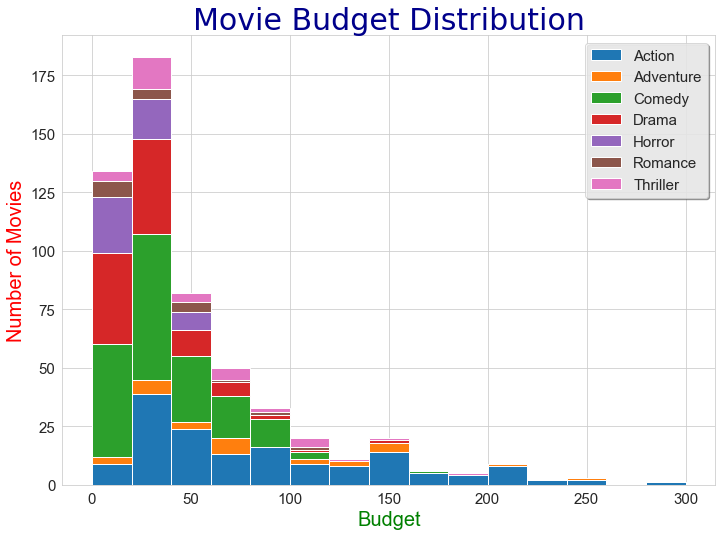

In [42]:
list1 = list () #Create a empty list
label_list = list ()

for gen in movies.Genre.cat.categories: #Remeber put the :
    list1.append (movies[movies.Genre == gen ].BudgetMillions) #Add items to a list 
    label_list.append (gen)

sns.set_style  ("whitegrid") 
fig, ax = plt.subplots()
fig.set_size_inches (11.7,8.27) #size of A4 paper
h = plt.hist(list1, bins=15, stacked=True, label=label_list, rwidth=5) #make the graph with the list
plt.title("Movie Budget Distribution", fontsize=30, color="DarkBlue", fontname="Console")
plt.ylabel("Number of Movies",fontsize=20, color="Red")
plt.xlabel("Budget", fontsize=20, color="Green")
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.legend (prop={"size":15}, frameon=True, fancybox=True, shadow=True, framealpha=0.75) #Change the size legend   #(loc="upper left", bbox_to_anchor= (1,1)) #Label show
plt.show()